In [2]:
import pandas as pd

benin = pd.read_csv("../data/benin_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")
sierra = pd.read_csv("../data/sierraleone_clean.csv")

In [3]:
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

In [4]:
df_all = pd.concat([benin, sierra, togo], ignore_index=True)

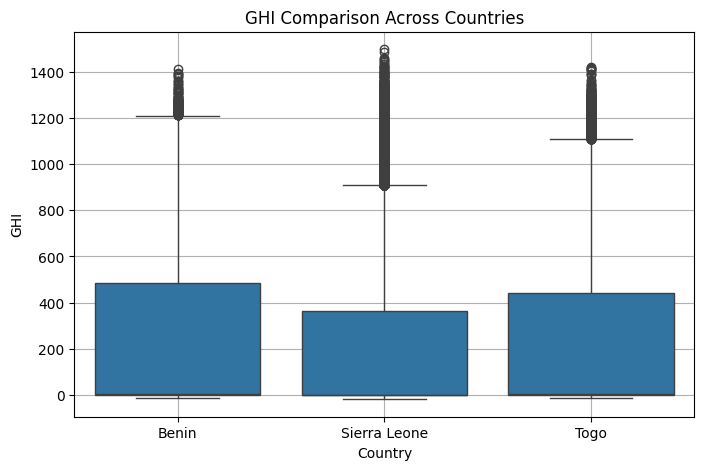

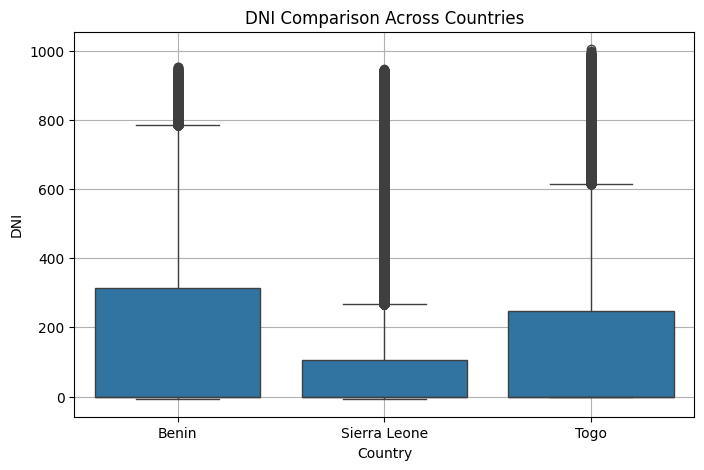

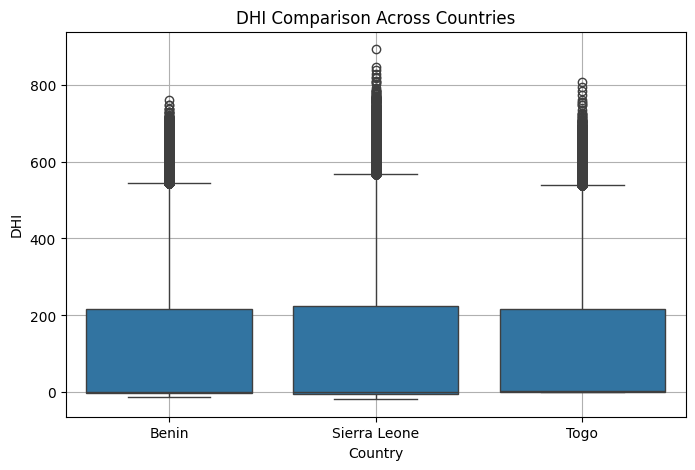

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Country', y=metric, data=df_all)
    plt.title(f'{metric} Comparison Across Countries')
    plt.grid(True)
    plt.show()


In [6]:
stats = df_all.groupby('Country')[['GHI', 'DHI', 'DNI']].agg(['mean', 'std']).round(2)

In [8]:
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
print(summary)


                 GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.49  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.55    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52  


In [9]:
from scipy.stats import f_oneway


ghi_benin = benin['GHI'].dropna()
ghi_sierra = sierra['GHI'].dropna()
ghi_togo = togo['GHI'].dropna()


f_stat, p_val = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
print(f"ANOVA p-value: {p_val:.4f}")


ANOVA p-value: 0.0000


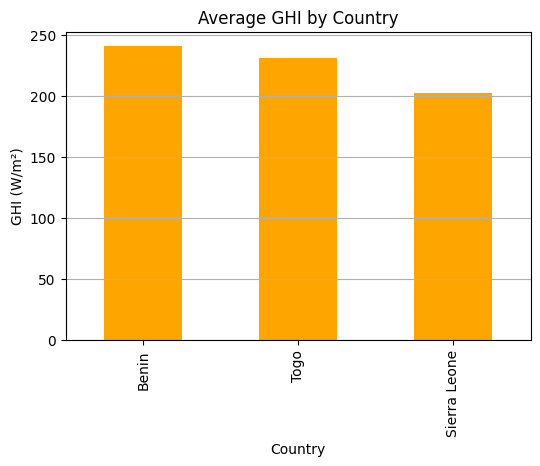

In [10]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
avg_ghi.plot(kind='bar', color='orange')
plt.title('Average GHI by Country')
plt.ylabel('GHI (W/m²)')
plt.grid(axis='y')
plt.show()
